#### Prerequisites

- Basic familiarity with [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- Basic familiarity with [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) 

## Outline

- [Section 1](#section-1): Data Loading
- [Section 2](#section-2): Data Cleaning
- [Section 3](#section-3): More Data Cleaning
- [Section 4](#section-4): Descriptive Statistics
- [Section 5](#section-5): Visualization


# Data exploration

In this notebook, we will learn some basic python functions which are helpful to gain a first overview whenever you face an unknown data set.

You will work with a data set that consists of climbing data of [Mount Rainier](https://goo.gl/maps/WyAMb5BRBrgRECNB9). Mount Rainier is a 4,392 meters high stratovolcano in Washington, USA, and is considered difficult to summit. You must download the data set from Blackboard.

We start with importing the required packages: numpy, pandas, and matplotlib.

In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

<a name="section-1"></a>
## Section 1: Data Loading

Now we load the data set into a pandas data frame, which is standard the representation of a matrix with row and column names in python.

_When using Google Colab, you first need to upload the data set to your notebook. This can be done by `files.upload()` from Google Colab's own python package `google.colab`._

In [ ]:
# only use when running this notebook in Google Colab, ignore this cell when running this notebook on your own machine
from google.colab import files

climbing_data = files.upload()

In [2]:
# load data as pandas data frames
climbing = pd.read_csv('climbing_statistics.csv', parse_dates=['Date'])

It is important to inform the [**read_csv**](https://pandas.pydata.org/pandas-docs/version/0.20.1/generated/pandas.read_csv.html) function about the columns corresponding to dates through `parse_dates` argument, to avoid loading the date as a string instead of datetime object. This is necessary to enable sorting rows by date columns and other operations related to date and time.

The first step should always be to see the first few rows of your data set. This can easily be done with `.head()` when the object preceding it is a pandas data frame. 

In the parentheses of `.head()`, you can specify how many rows you would like to see (default is 5), and the function `.tail()` lets you see the last few rows.

We print here the first 10 rows.

In [3]:
climbing.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.0
1,2015-11-21,Disappointment Cleaver,3,0,0.0
2,2015-10-15,Disappointment Cleaver,2,0,0.0
3,2015-10-13,Little Tahoma,8,0,0.0
4,2015-10-09,Disappointment Cleaver,2,0,0.0
5,2015-10-03,Disappointment Cleaver,10,0,0.0
6,2015-10-03,Disappointment Cleaver,2,0,0.0
7,2015-10-02,Kautz Glacier,2,0,0.0
8,2015-10-02,Disappointment Cleaver,2,0,0.0
9,2015-09-30,Disappointment Cleaver,2,0,0.0


<a name="section-2"></a>

## Data Cleaning

In the rows with indices **5** and **6** has gone something wrong. The **Date** and **Route** taken to the summit are exactly the same, so why has this not been summarised in one single row? Such things are very common in real data sets and are part of **data cleaning**. 

We will go through a couple of examples how this data set can be cleaned, i.e., made ready to be used by machine learning models.

### Method 1: Using higher-level Pandas operations

In [4]:
# aggregating the rows when Date and Route are identical
climbing_clean_0 = climbing.groupby(['Date', 'Route']).sum().sort_values(['Date', 'Route'], ascending=False).reset_index()
# recalculate the success percentage
climbing_clean_0['Success Percentage'] = climbing_clean_0['Succeeded'] / climbing_clean_0['Attempted']

Now check the DataFrame after aggregating the rows by **Date** and **Route**

In [5]:
climbing_clean_0.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.000000
1,2015-11-21,Disappointment Cleaver,3,0,0.000000
2,2015-10-15,Disappointment Cleaver,2,0,0.000000
3,2015-10-13,Little Tahoma,8,0,0.000000
4,2015-10-09,Disappointment Cleaver,2,0,0.000000
5,2015-10-03,Disappointment Cleaver,12,0,0.000000
6,2015-10-02,Kautz Glacier,2,0,0.000000
7,2015-10-02,Disappointment Cleaver,2,0,0.000000
8,2015-09-30,Disappointment Cleaver,2,0,0.000000
9,2015-09-28,Disappointment Cleaver,12,4,0.333333


### Method 2: Looping over the rows

In [6]:
# create a sorted copy from climbing dataframe, with indices 0, 1, ..., n-1
climbing_clean_1 = climbing.sort_values(['Date', 'Route'], ascending=False, ignore_index=True)

# aggregating the rows when Date and Route are identical
for index, row in climbing_clean_1.iterrows():
    # skip the first row
    if index == 0:
        continue

    if (climbing_clean_1.loc[index-1, 'Date'] == climbing_clean_1.loc[index, 'Date'] and \
        climbing_clean_1.loc[index-1, 'Route'] == climbing_clean_1.loc[index, 'Route']):
      
        climbing_clean_1.loc[index, 'Attempted'] += climbing_clean_1.loc[index-1, 'Attempted']
        climbing_clean_1.loc[index, 'Succeeded'] += climbing_clean_1.loc[index-1, 'Succeeded']
        
    # recalculate the success percentage
    climbing_clean_1.loc[index, 'Success Percentage'] = climbing_clean_1.loc[index, 'Succeeded'] / climbing_clean_1.loc[index, 'Attempted']

In [7]:
# check
climbing_clean_1.tail(20)

,Date,Route,Attempted,Succeeded,Success Percentage
4057,2014-01-25,Ingraham Direct,10,2,0.200000
4058,2014-01-25,Gibralter Ledges,2,0,0.000000
4059,2014-01-25,Gibralter Ledges,4,0,0.000000
4060,2014-01-24,Ingraham Direct,2,0,0.000000
4061,2014-01-24,Gibralter Ledges,2,2,1.000000
4062,2014-01-24,Gibralter Ledges,3,2,0.666667
4063,2014-01-24,Gibralter Ledges,5,4,0.800000
4064,2014-01-24,Gibralter Ledges,7,6,0.857143
4065,2014-01-24,Gibralter Ledges,9,6,0.666667
4066,2014-01-23,Little Tahoma,2,0,0.000000


You can see that we were able to sum up the number of Attempted summits, but still have both rows in our data frame. Pandas has a one-line command to delete the first of these duplicates and only keep the last.

In [8]:
climbing_clean_1 = climbing_clean_1.drop_duplicates(subset=['Date', 'Route'], keep='last')

In [9]:
# check
climbing_clean_1.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.000000
1,2015-11-21,Disappointment Cleaver,3,0,0.000000
2,2015-10-15,Disappointment Cleaver,2,0,0.000000
3,2015-10-13,Little Tahoma,8,0,0.000000
4,2015-10-09,Disappointment Cleaver,2,0,0.000000
6,2015-10-03,Disappointment Cleaver,12,0,0.000000
7,2015-10-02,Kautz Glacier,2,0,0.000000
8,2015-10-02,Disappointment Cleaver,2,0,0.000000
9,2015-09-30,Disappointment Cleaver,2,0,0.000000
10,2015-09-28,Disappointment Cleaver,12,4,0.333333


Now we have the data frame that we wanted. The indices can simply be reset with `.reset_index()`.

In [10]:
climbing_clean_1 = climbing_clean_1.reset_index(drop=True)  # with drop=True, drop the old index and create a new one

In [11]:
# check
climbing_clean_1.head(10)

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.000000
1,2015-11-21,Disappointment Cleaver,3,0,0.000000
2,2015-10-15,Disappointment Cleaver,2,0,0.000000
3,2015-10-13,Little Tahoma,8,0,0.000000
4,2015-10-09,Disappointment Cleaver,2,0,0.000000
5,2015-10-03,Disappointment Cleaver,12,0,0.000000
6,2015-10-02,Kautz Glacier,2,0,0.000000
7,2015-10-02,Disappointment Cleaver,2,0,0.000000
8,2015-09-30,Disappointment Cleaver,2,0,0.000000
9,2015-09-28,Disappointment Cleaver,12,4,0.333333


Check if the results from Method 1 matches with results from Method 2

In [12]:
# Any differences will be shown
climbing_clean_0.compare(climbing_clean_1)


Empty DataFrame
Columns: []
Index: []

<a name="section-3"></a>

## Section 3: More Data Cleaning

Next, we find other manual mistakes in the data set. After having reviewed some random rows by hand, we find that on some dates there were more Succeeded summits than Attempted summits. This must be a mistake and we delete these rows.

In [13]:
# deleting rows, where number of successes is higher than number of attempts
mistake_rows = climbing_clean_0[climbing_clean_0['Succeeded'] > climbing_clean_0['Attempted']]

In [14]:
# check
mistake_rows

,Date,Route,Attempted,Succeeded,Success Percentage
113,2015-07-27,Emmons-Winthrop,20,21,1.050000
135,2015-07-20,Disappointment Cleaver,67,99,1.477612
674,2014-07-11,Kautz Glacier,13,14,1.076923


In [15]:
# delete these rows
climbing_clean_1 = climbing_clean_0.drop(index=mistake_rows.index)

In [16]:
# deleted?
climbing_clean_1[climbing_clean_1['Succeeded'] > climbing_clean_1['Attempted']]

,Date,Route,Attempted,Succeeded,Success Percentage


Success! All rows are deleted which had a higher number of successes than attempts.

In [17]:
# reset index again
climbing_clean_1 = climbing_clean_1.reset_index().drop(columns='index')


In [18]:
# check
climbing_clean_1.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.0
1,2015-11-21,Disappointment Cleaver,3,0,0.0
2,2015-10-15,Disappointment Cleaver,2,0,0.0
3,2015-10-13,Little Tahoma,8,0,0.0
4,2015-10-09,Disappointment Cleaver,2,0,0.0


<a name="section-4"></a>

## Section 4: Descriptive Statistics

It's always a good idea to compute some basic statistics of our data in the beginning. We start with simple means and standard deviations.

In [19]:
climbing_clean_1.describe()

,Attempted,Succeeded,Success Percentage
count,1013.000000,1013.000000,1013.000000
mean,20.585390,10.777887,0.395417
std,26.615248,17.204163,0.392312
min,1.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,8.000000,2.000000,0.369863
75%,31.000000,16.000000,0.752577
max,182.000000,98.000000,1.000000


<a name="section-5"></a>

## Section 5: Visualization

We can also plot the attempts and successes over time. Our first column is already a date, but pandas has a special data type for dates, which it calls `datetime`.

Let's first see in which format our column `Date` saved its values at. 

In [20]:
# check data types
climbing_clean_1.dtypes

Date                  datetime64[ns]
Route                         object
Attempted                      int64
Succeeded                      int64
Success Percentage           float64
dtype: object

This makes it now very easy to plot histograms over time.

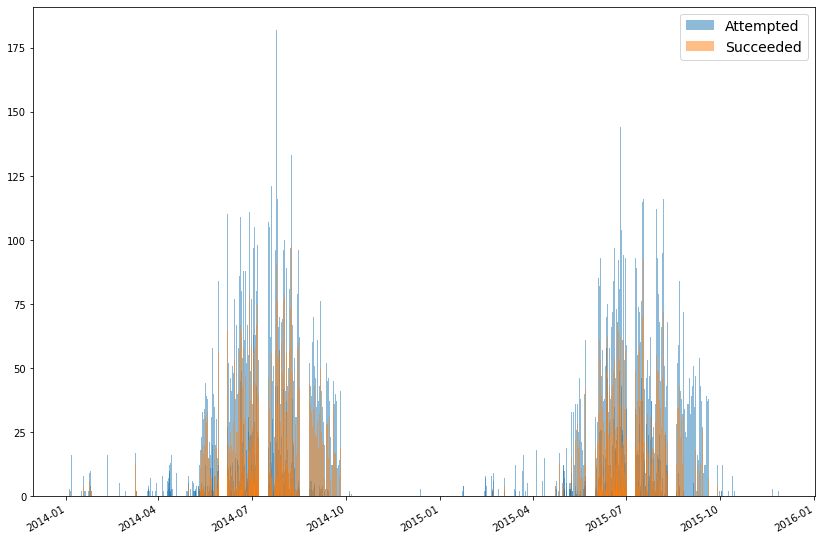

In [21]:
fig, ax = plt.subplots(figsize=(14,10))

for col in ['Attempted', 'Succeeded']:
  ax.bar(climbing_clean_1['Date'], climbing_clean_1[col], alpha=0.5, label=col)
ax.legend(fontsize=14)

# rotates and right aligns the x labels, and moves the bottom of the axes up to make room for them
fig.autofmt_xdate();